In [1]:
import numpy as np
from TDD.TDD import Ini_TDD,Clear_TDD,set_index_order,get_unique_table_num,set_root_of_unit,get_count,renormalize
from TDD.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs,gen_cir
from TDD.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
import cProfile

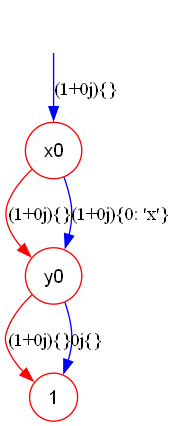

In [2]:
Ini_TDD(['x0','y0','z0','x1','y1','z1','x2','y2','z2'])
H=1/np.sqrt(2)*np.array([[1,1],[1,-1]])
I=np.array([[1,0],[0,1]])
X=np.array([[0,1],[1,0]])
T=np.array([[1,0],[0,np.exp(1j*np.pi/4)]])
var=[Index('x0'),Index('y0')]
ts1=Tensor(I,var)
ts1.tdd().show()
# var2=[Index('y0'),Index('z0')]
# ts2=Tensor(X,var2)
# tn=TensorNetwork([ts1,ts2])
# tdd=tn.cont()
# tdd.show()

0.2814044952392578
(-0.026673543456039006+0.042298543456039936j)
14


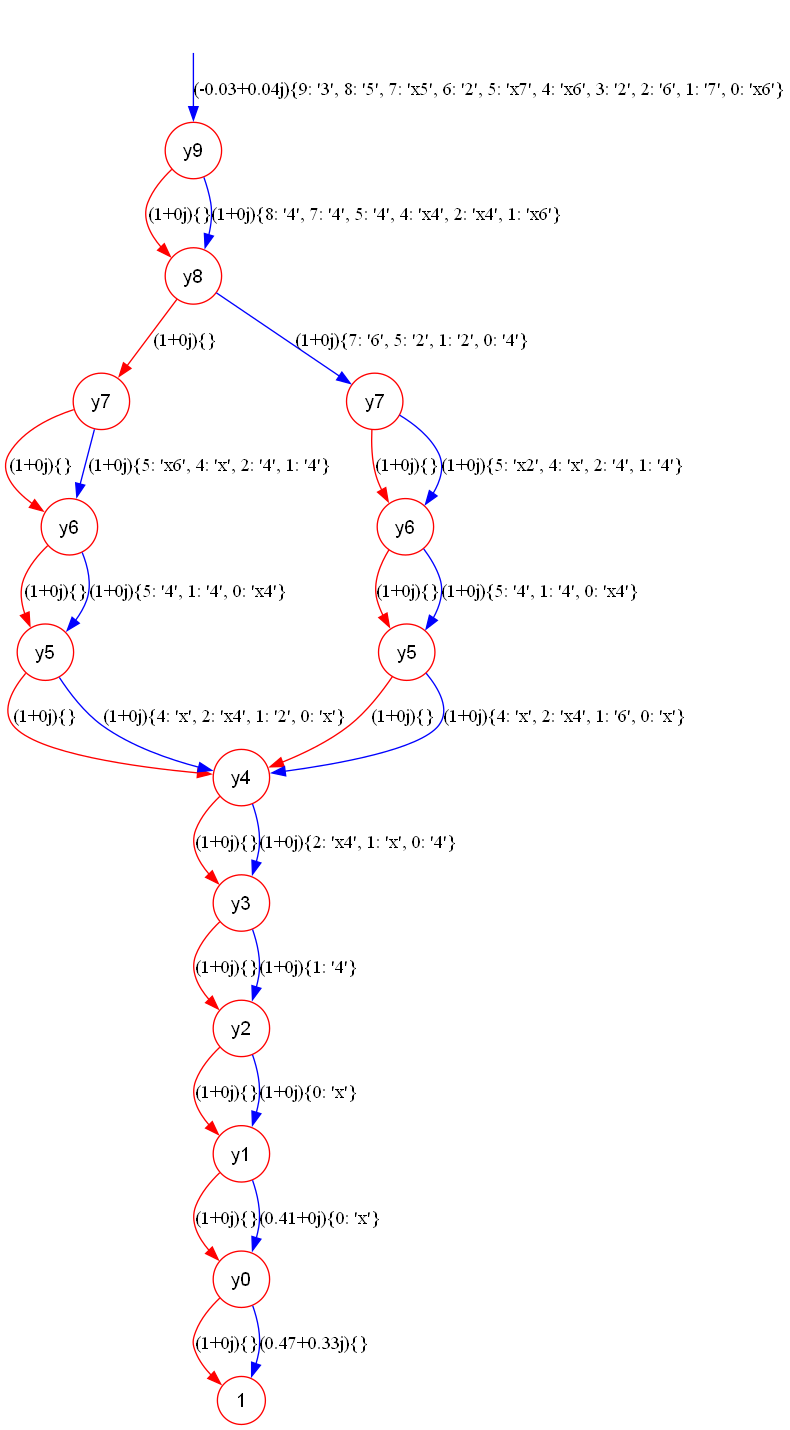

In [7]:
path='Benchmarks/'
file_name="test1.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs = cir_2_tn(cir)
add_inputs(tn,[0]*10,10)
all_indexs.reverse()
Ini_TDD(index_order=all_indexs)
set_root_of_unit(2**3)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# tdd=renormalize(tdd)
tdd.show()

['s', 's', 'cx', 'cx', 'x', 'x', 'y', 'z', 'x', 'x', 'x', 'h', 't', 'cx', 'y', 't', 's', 's', 's', 'z', 'h', 't', 't', 'h', 's', 's', 's', 't', 'y', 'z', 'z', 'cx', 't', 'h', 'cx', 't', 'y', 'y', 'y', 'h', 't', 'z', 't', 'x', 't', 't', 's', 'z', 'h', 'h', 'h', 'y', 'z', 'x', 't', 'cx', 't', 'cx', 'cx', 'z', 't', 's', 't', 'cx', 'cx', 's', 'cx', 'x', 'z', 'z', 'z', 't', 'y', 'h', 't', 'y', 'h', 'cx', 'x', 'x', 'y', 'y', 'x', 't', 'x', 'x', 'x', 't', 'y', 'x', 'cx', 'h', 's', 't', 't', 'cx', 'x', 'z', 'y', 'cx']
0.052989959716796875
(-0.07544417382415916+0.03125000000000011j)
11


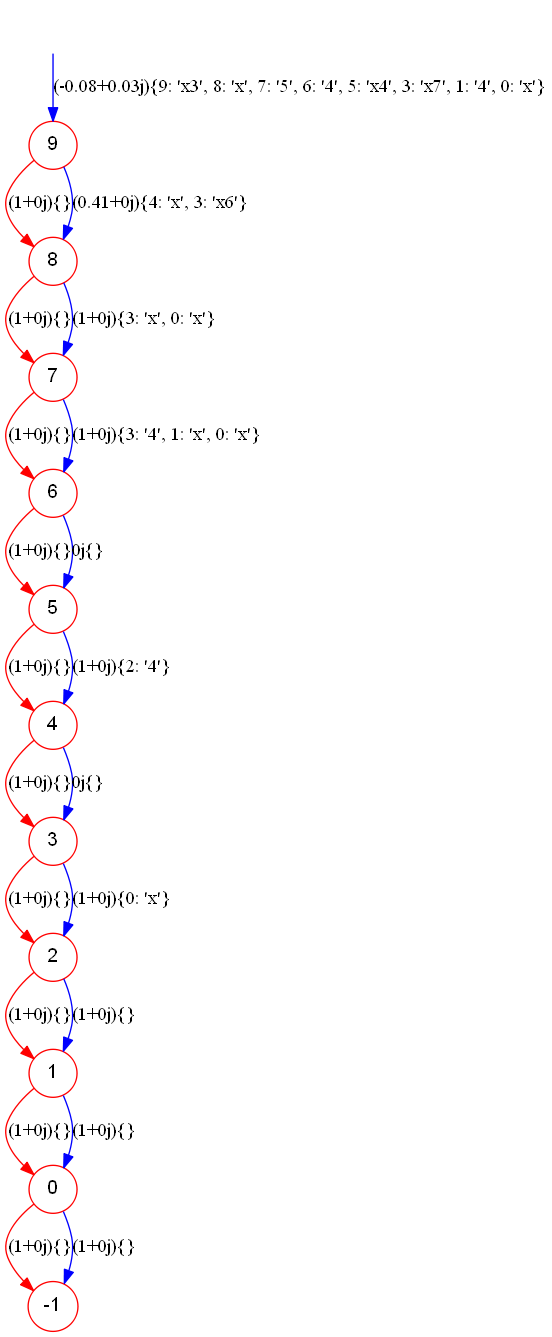

In [4]:
n=10
m=100
cir=gen_cir('Random_Clifford_T',n,m)
tn,all_indexs = cir_2_tn(cir)
tn.tensors=[ts for ts in tn.tensors if ts.name!='nu_q']
A=[ts.name for ts in tn.tensors]
print(A)
n=get_real_qubit_num(cir)
add_inputs(tn,[0]*n,n)
Ini_TDD(index_order=all_indexs)
t_start=time.time()
tdd=tn.cont()
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
tdd.show(False)

In [5]:
# with open('test4.qasm','w') as f:
#     f.write(cir.qasm())
# # cir.draw()

['s', 'h', 's', 'cx', 'y', 'h', 'z', 'z', 'y', 't', 'h', 'y', 'x', 'x', 't', 's', 'z', 'x', 't', 't', 't', 'y', 'y', 't', 't', 'y', 't', 'x', 'x', 'x', 't', 't', 'z', 'h', 'z', 'cx', 'y', 'z', 'cx', 'h', 't', 't', 's', 't', 't', 's', 's', 'z', 'h', 'x', 's', 'x', 's', 'cx', 'h', 'cx', 'z', 't', 'x', 'h', 'h', 'cx', 'cx', 'z', 't', 'h', 'x', 'y', 'y', 't', 'cx', 's', 's', 'cx', 'z', 'x', 'y', 'x', 't', 't', 't', 'z', 'z', 's', 'h', 'x', 'cx', 'cx', 'cx', 'x', 'x', 'y', 'y', 't', 'cx', 'y', 's', 'cx', 'cx', 'x']
0.050995588302612305
(-0.07544417382415913+0.031250000000000104j)
11


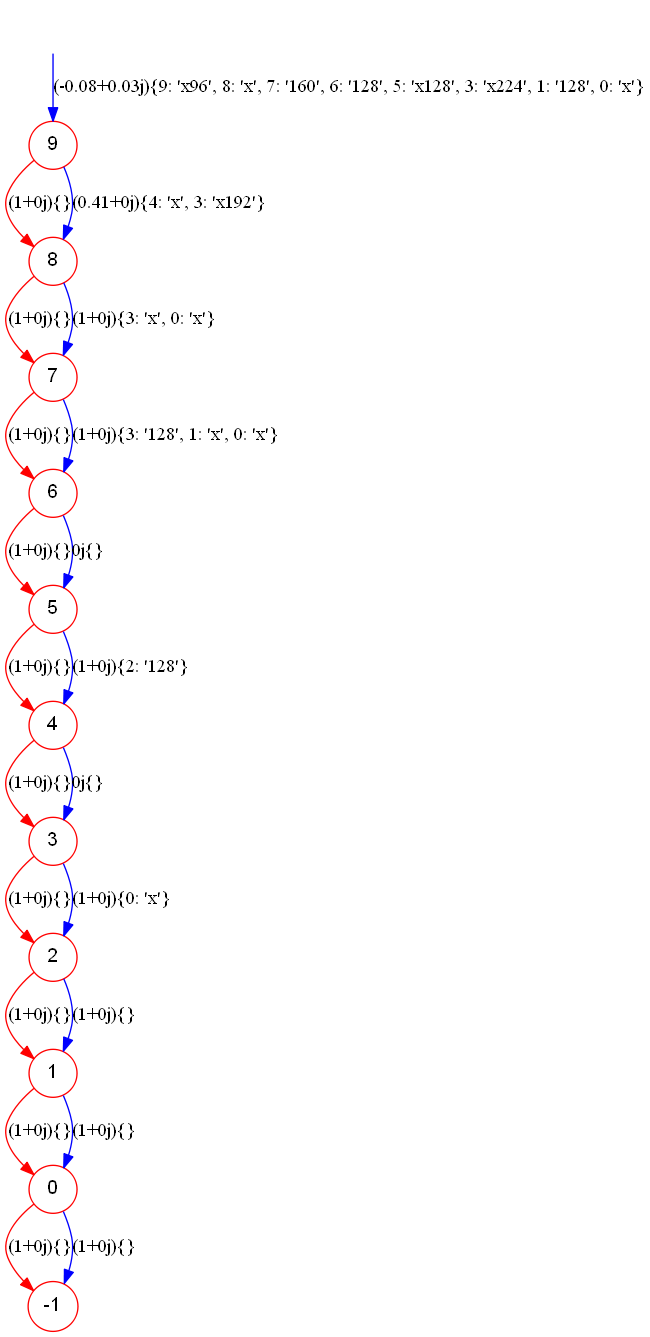

In [6]:
# path='Benchmarks/'
path=''
file_name="test4.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)
tn,all_indexs = cir_2_tn(cir)
tn.tensors=[ts for ts in tn.tensors if ts.name!='nu_q']
A=[ts.name for ts in tn.tensors]
print(A)
var=['x'+str(k) for k in range(20)]
var+=[i for i in all_indexs if not i in var]

Ini_TDD(index_order=all_indexs)
set_root_of_unit(2**8)
n=get_real_qubit_num(cir)
# print(n,len(tn.tensors))
add_inputs(tn,[0]*n,n)
t_start=time.time()
tdd=tn.cont()
# cProfile.run('tdd=tn.cont()',sort="cumulative")
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# print(get_unique_table_num())
# get_count()
tdd.show(False)

['z', 'sdg', 's', 'cx', 'x', 's', 'z', 'y', 'cx', 'z', 'h', 'x', 'x', 'z', 'z', 'cx']
0.009001016616821289
0.7071067811865475j
5


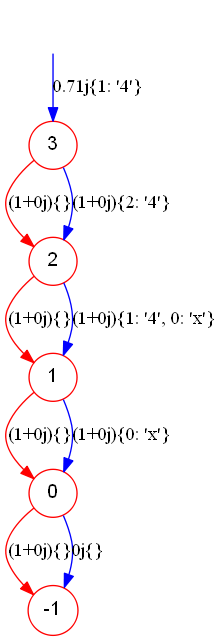

In [7]:
# 0.17199373245239258 26 196 1892
# 0.17502999305725098 26 518 5076
# 0.42098450660705566 26 1074 10660
# 0.7130036354064941  26 2022 20530
path=''
file_name="test3.qasm"
cir = QuantumCircuit.from_qasm_file(path+file_name)

cir2=QuantumCircuit(2)
cir2.z(0)
cir2.sdg(1)
# cir2.cx(0,1)
# cir2.cx(0,1)
# cir2.cx(1,0)
# cir2.cx(0,1)
cir=cir2+cir
cir.x(1)
cir.z(1)
cir.z(0)
cir.cx(1,0)
tn,all_indexs = cir_2_tn(cir)
tn.tensors=[ts for ts in tn.tensors if ts.name!='nu_q']
A=[ts.name for ts in tn.tensors]
print(A)
var=['x'+str(k) for k in range(20)]
var+=[i for i in all_indexs if not i in var]

var=['x1','y1','x0','y0']
var+=[a for a in all_indexs if not a in var]

Ini_TDD(index_order=all_indexs)
# set_root_of_unit(2**30)
n=get_real_qubit_num(cir)
# print(n,len(tn.tensors))
# add_inputs(tn,[0]*n,n)
t_start=time.time()
tdd=tn.cont()
# cProfile.run('tdd=tn.cont()',sort="cumulative")
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# print(get_unique_table_num())
# get_count()
tdd.show(False)

['cx', 'cx']
0.0019989013671875
(1+0j)
5


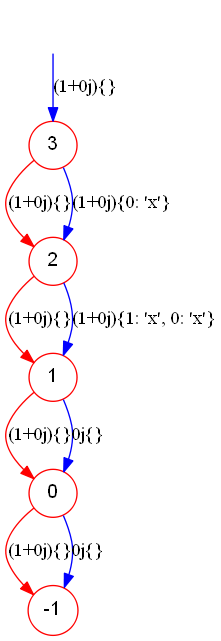

In [5]:
cir2=QuantumCircuit(2)

cir2.cx(0,1)
cir2.cx(1,0)
tn,all_indexs = cir_2_tn(cir2)
tn.tensors=[ts for ts in tn.tensors if ts.name!='nu_q']
A=[ts.name for ts in tn.tensors]
print(A)
var=['x'+str(k) for k in range(20)]
var+=[i for i in all_indexs if not i in var]

Ini_TDD(index_order=all_indexs)
# set_root_of_unit(2**30)
# n=get_real_qubit_num(cir)
# print(n,len(tn.tensors))
# add_inputs(tn,[0]*n,n)
t_start=time.time()
tdd=tn.cont()
# cProfile.run('tdd=tn.cont()',sort="cumulative")
print(time.time()-t_start)
print(tdd.weight)
print(tdd.node_number())
# print(get_unique_table_num())
# get_count()
tdd = renormalize(tdd)
tdd.show(False)

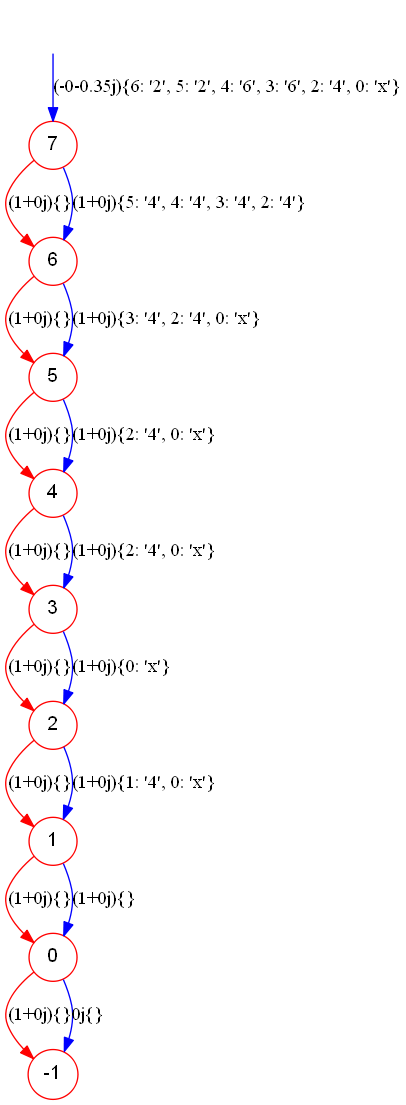

In [68]:
n=4
m=100
cir=gen_cir('Random_Clifford',n,m)
tn,all_indexs = cir_2_tn(cir)
tn.tensors=[ts for ts in tn.tensors if ts.name!='nu_q']
A=[ts.name for ts in tn.tensors]
Ini_TDD(index_order=all_indexs)
tdd=tn.cont()
tdd = renormalize(tdd)
tdd.show(False,'output')

cir.cx(2,1)
tn,all_indexs = cir_2_tn(cir)
tn.tensors=[ts for ts in tn.tensors if ts.name!='nu_q']
A=[ts.name for ts in tn.tensors]
Ini_TDD(index_order=all_indexs)
tdd=tn.cont()
tdd = renormalize(tdd)
tdd.show(False,'output1')

In [69]:
import IPython.display as display
import ipywidgets as widgets

img1=open('output.png','rb').read()
wi1 = widgets.Image(value=img1, format='png', width=300, height=400)
img2=open('output1.png','rb').read()
wi2 = widgets.Image(value=img2, format='png', width=300, height=400)
a=[wi1,wi2]
wid=widgets.HBox(a)
display.display(wid)